# REST API
- Representational State Transfer
- Client와 Server가 통신하기 위한 URL 구조에 대한 정의 및 디자인

## 1\. Kakao API

### 1-1. request token 얻기
- `https://developers.kakao.com/`
- 내 애플리케이션 > 애플리케이션 추가하기

### 1-2. KoGPT
- 문서 > KoGPT > REST API
- tokens : 공백을 제외한 글자수

#### 1. 다음문장 만들기

#### 2. 문장 분류하기
- 문장 마다 `=긍정`, `=부정` 문자열 작성
- 분류할 마지막 문장 `=` 문자열 작성

#### 3. 뉴스 한 줄 요약하기
- 마지막에 `한줄 요약:` 문자열 작성

#### 4. 질문에 답변하기
- 문장 마지막에 `?:` 로 끝남

#### 5. 응용하기

## 2\. Naver API
- 통합검색어 트렌드 API
    - https://datalab.naver.com/
    - https://datalab.naver.com/keyword/trendSearch.naver

In [1]:
import pandas as pd
import requests
import json

### 2-1. Request Token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [2]:
CLIENT_ID, CLIENT_SECRET = 'Gw4RWTaLRC_ezEtlUt6P', 'zhQKsb_YcC'

### 2-2. 통합검색어 트렌드 API
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [6]:
# 1. URL
url = 'https://openapi.naver.com/v1/datalab/search'

In [16]:
# 2. request > response(json)
params = {
    'startDate': '2018-01-01',
    'endDate': '2023-12-31',
    'timeUnit': 'month',
    'keywordGroups': [
        {'groupName': '트위터',
         'keywords': ['트위터', '트윗']},
        {'groupName': '페이스북',
         'keywords': ['페이스북', '페북']},
        {'groupName': '인스타그램',
         'keywords': ['인스타그램', '인스타']}
    ]
}

headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': CLIENT_ID,
    'X-Naver-Client-Secret': CLIENT_SECRET
}

# 한글 인코딩을 해야 하므로 json.dumps 사용
response = requests.post(url, data=json.dumps(params), headers=headers)
response

<Response [200]>

In [17]:
# 3. parsing
data = response.json()['results']
data

[{'title': '트위터',
  'keywords': ['트위터', '트윗'],
  'data': [{'period': '2018-01-01', 'ratio': 14.59502},
   {'period': '2018-02-01', 'ratio': 13.0238},
   {'period': '2018-03-01', 'ratio': 12.97953},
   {'period': '2018-04-01', 'ratio': 12.82991},
   {'period': '2018-05-01', 'ratio': 13.05391},
   {'period': '2018-06-01', 'ratio': 13.34512},
   {'period': '2018-07-01', 'ratio': 13.02773},
   {'period': '2018-08-01', 'ratio': 13.45399},
   {'period': '2018-09-01', 'ratio': 12.83755},
   {'period': '2018-10-01', 'ratio': 13.05677},
   {'period': '2018-11-01', 'ratio': 12.77338},
   {'period': '2018-12-01', 'ratio': 12.86931},
   {'period': '2019-01-01', 'ratio': 13.31172},
   {'period': '2019-02-01', 'ratio': 11.74776},
   {'period': '2019-03-01', 'ratio': 11.82313},
   {'period': '2019-04-01', 'ratio': 12.32991},
   {'period': '2019-05-01', 'ratio': 12.43771},
   {'period': '2019-06-01', 'ratio': 13.29913},
   {'period': '2019-07-01', 'ratio': 14.00593},
   {'period': '2019-08-01', 'ratio

In [21]:
# 4. preprocessing
dfs = []
for row in data:
    df = pd.DataFrame(row['data'])
    df['title'] = row['title']
    dfs.append(df)

In [22]:
# len(dfs), dfs[2]
result = pd.concat(dfs, ignore_index=True)
result

,period,ratio,title
0,2018-01-01,14.59502,트위터
1,2018-02-01,13.02380,트위터
2,2018-03-01,12.97953,트위터
3,2018-04-01,12.82991,트위터
4,2018-05-01,13.05391,트위터
...,...,...,...
211,2023-08-01,21.96847,인스타그램
212,2023-09-01,21.10131,인스타그램
213,2023-10-01,22.15029,인스타그램
214,2023-11-01,23.18797,인스타그램


In [29]:
pivot_df = pd.pivot(index='period', columns='title', values='ratio', data=result)
pivot_df.columns = ['instagram', 'twitter', 'facebook']
pivot_df

,instagram,twitter,facebook
period,,,
2018-01-01,23.41982,14.59502,97.80481
2018-02-01,22.53544,13.02380,89.05814
2018-03-01,25.39880,12.97953,98.84292
2018-04-01,26.55983,12.82991,100.00000
2018-05-01,28.60035,13.05391,92.23588
...,...,...,...
2023-08-01,21.96847,26.76331,11.52409
2023-09-01,21.10131,23.00812,10.46711
2023-10-01,22.15029,24.13886,10.44804


<Axes: xlabel='period'>

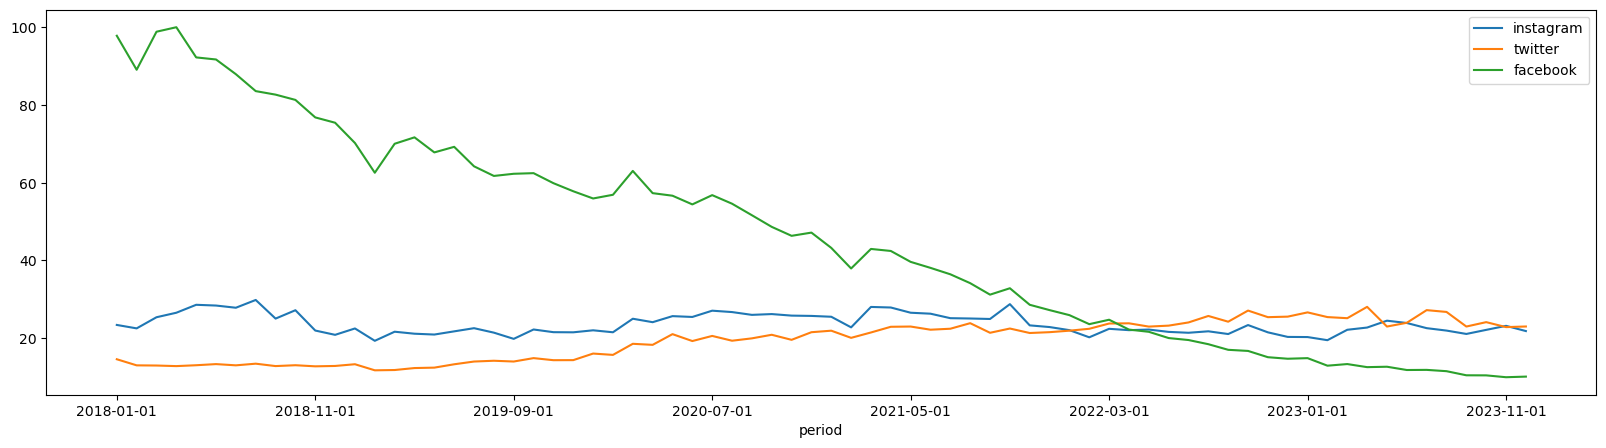

In [31]:
pivot_df.plot(figsize=(20,5))